In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc,roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import tree
import lightgbm as lgb

In [22]:
os.chdir("/home/zozo/Documents/edwisor/Project/Santander")

In [23]:
os.getcwd()

'/home/zozo/Documents/edwisor/Project/Santander'

In [24]:
train=pd.read_csv("train.csv")

In [25]:
train.shape

(200000, 202)

In [6]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [31]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


look at the summary of variables from var_0 to var_199. If you will observe summary of these variables then you will finnd out that the mean value of these variables is not very small when compared to the max value of these variables that means outliers does not exist in dataset.

In [8]:
train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

#### Missing value analysis

In [11]:
train.isnull().sum().sum()

0

as we can see that there are no missing values in the data

##### Important Features

/home/zozo/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00641383 0.00561374 0.00616793 0.00466284 0.00473847 0.0051515
 0.00651992 0.00429657 0.00470441 0.00518935 0.00437371 0.00478
 0.0069188  0.00553926 0.00422995 0.00466806 0.00449186 0.00447242
 0.00540007 0.00449142 0.00425106 0.00579067 0.00617155 0.00476257
 0.00465495 0.00465884 0.00713639 0.00477446 0.00471055 0.00447958
 0.00439232 0.0044099  0.00494567 0.00537645 0.00556306 0.00486624
 0.00496885 0.00436784 0.00457349 0.00438331 0.00571904 0.00481349
 0.00439452 0.00491551 0.00598511 0.00461414 0.0044799  0.00432435
 0.00477775 0.00483256 0.00476865 0.00487104 0.00507819 0.00715959
 0.00430985 0.00457941 0.00517015 0.00443205 0.00472777 0.00443701
 0.00448251 0.00430383 0.00459509 0.00454632 0.00436951 0.00453222
 0.0047215  0.00526444 0.00470641 0.00476776 0.00472194 0.00485549
 0.0045089  0.00449028 0.00458676 0.00515485 0.00622069 0.00448594
 0.00548866 0.00460816 0.00628813 0.00902215 0.00451676 0.00482563
 0.00462342 0.00477045 0.00539949 0.00503637 0.00460672 0.00523609

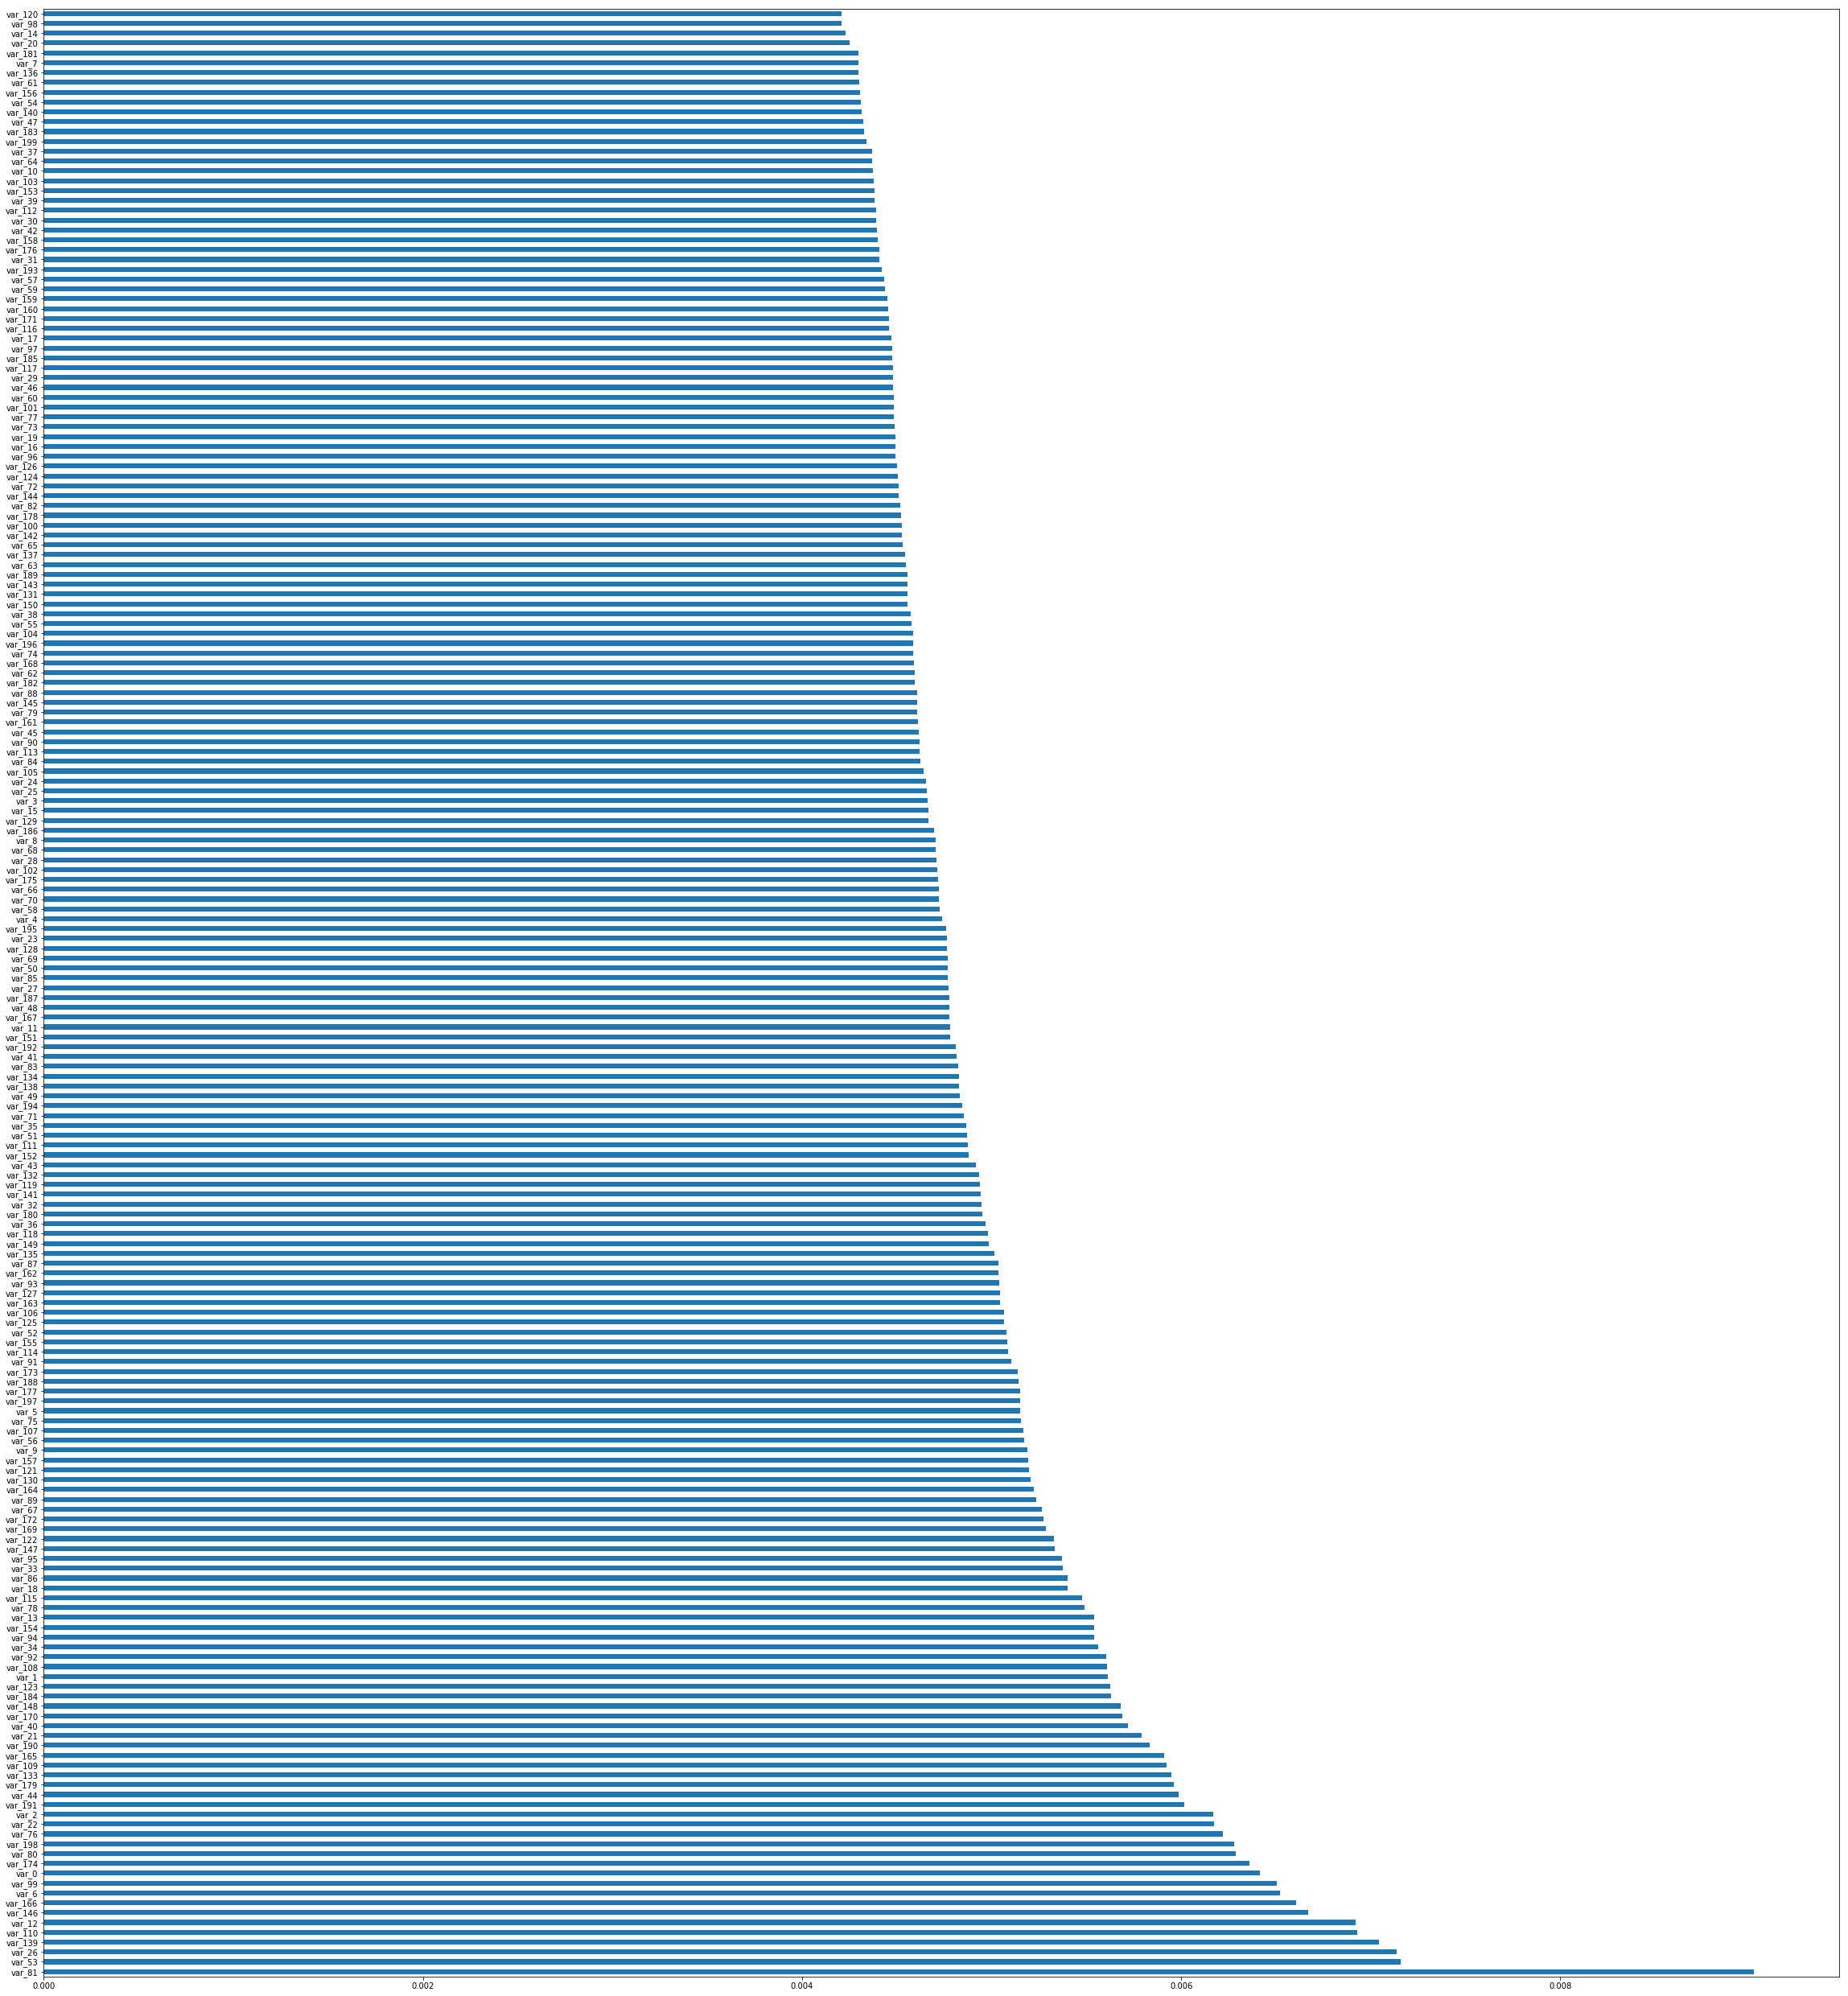

In [46]:
X = train.iloc[:,2:202]  #independent columns
y = train.iloc[:,1]    #target column i.e price range
model = ExtraTreesClassifier(random_state=42)
model.fit(X,y)
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
plt.subplots(figsize=(40,45))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(200).plot(kind='barh')
plt.show()


we can see that some of the most important variables are var_81,var_53,var_26 and var_139
and some of the least important variables in 200 variables are var_20,var_14,var_98 and var_120


##### Let's plot histogram of some of the variables

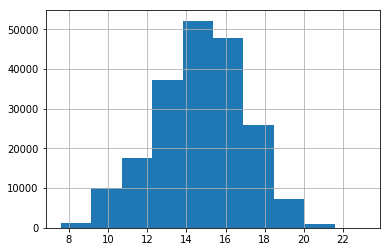

In [281]:
train['var_81'].hist()

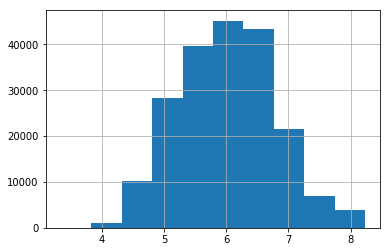

In [282]:
train['var_53'].hist()

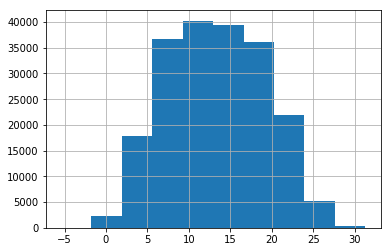

In [283]:
train['var_20'].hist()

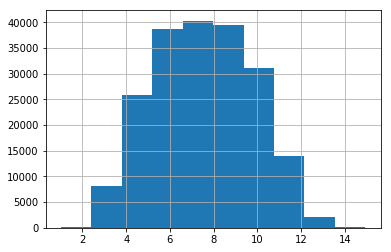

In [284]:
train['var_14'].hist()

if you will see all the histograms you can find out histogram of two of most important features are similar and histogram of least 2 important feature are similar

#### Let's count and visualize the labels of target variable

In [15]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

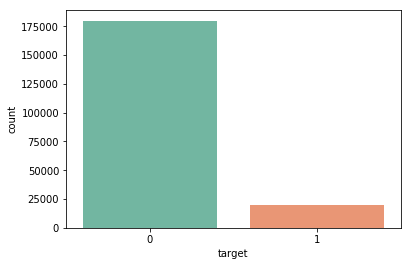

In [16]:
sns.countplot(train['target'],palette="Set2")

In [17]:
train['target'].describe()

count    200000.000000
mean          0.100490
std           0.300653
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

we can see that there are only 10.049% positivie labels present in target variable. There is target class imbalance problem

#### Let's look at the correlation between variables

In [18]:
df_corr=train.iloc[:,2:202]

In [19]:
df_corr.corr()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,6.982549e-03,0.002429,0.004962,-0.002613,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,3.257729e-03,0.001511,0.004098,-0.000832,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,8.825211e-04,-0.000991,0.002648,-0.001932,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-7.743892e-04,0.002500,0.003553,-0.000826,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,4.882529e-05,0.004549,0.001194,-0.000918,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786
var_5,0.003046,-0.000902,0.001569,0.003253,-0.001368,1.000000,2.587780e-03,-0.000995,0.000147,-0.005279,...,0.001466,-0.000022,0.001116,-0.002237,-0.002543,-0.001274,0.002880,-0.000535,-0.000953,0.002767
var_6,0.006983,0.003258,0.000883,-0.000774,0.000049,0.002588,1.000000e+00,-0.002548,-0.001188,-0.005697,...,0.000721,0.005604,-0.002563,0.002464,-0.001141,0.001244,0.005378,-0.003565,-0.003025,0.006096
var_7,0.002429,0.001511,-0.000991,0.002500,0.004549,-0.000995,-2.547746e-03,1.000000,0.000814,0.002885,...,-0.000337,-0.003957,0.001733,0.003219,-0.000270,0.001854,0.001045,0.003466,0.000650,-0.001457
var_8,0.004962,0.004098,0.002648,0.003553,0.001194,0.000147,-1.187995e-03,0.000814,1.000000,-0.001073,...,0.002923,-0.001151,-0.000429,0.001414,0.001313,0.001396,-0.003242,-0.004583,0.002950,0.000854
var_9,-0.002613,-0.000832,-0.001932,-0.000826,-0.000918,-0.005279,-5.696919e-03,0.002885,-0.001073,1.000000,...,-0.000871,-0.002371,-0.000014,-0.001407,0.003099,-0.000868,0.000052,0.003701,0.002343,0.001070


as we can see that there is very less correlation among independent variables

###### Let's build a logistic regression model 

In [26]:
train=train.drop(columns="ID_code", axis=1)

In [27]:
X = train.drop(columns="target")
y = train["target"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2,stratify=y)
print(X_train.shape)
print(X_test.shape)

(160000, 200)
(40000, 200)


In [28]:
#Logistic Regression
logit=LogisticRegression(random_state=42)
logit_model=logit.fit(X_train,y_train)

/home/zozo/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
logit_pred=logit_model.predict(X_test) 

In [33]:
CM = pd.crosstab(y_test,logit_pred)

In [34]:
CM

col_0,0,1
target,,
0,35515,465
1,2940,1080


In [35]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
Accuracy=((TN+TP)/(TN+FP+TP+FN))*100
print(Accuracy)

91.4875


even though we are getting high accuracy but sometimes accuracy is not the best measure to evaluate a model specially if we have imbalanced data. So we will be using other measures like roc,auc and f1-scores

In [32]:
FPR,TPR,thresholds=roc_curve(y_test,logit_pred)

In [33]:
print(auc(FPR,TPR))

0.626717855967522


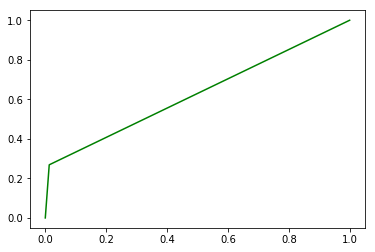

In [38]:
plt.plot(FPR,TPR,'g')

In [39]:
print(classification_report(y_test,logit_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.70      0.27      0.39      4020

    accuracy                           0.91     40000
   macro avg       0.81      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000



as we can see that f1-score is very low for positive class.
so by looking at the roc_curve and f1-score we can say that this model is not performing well on imbalanced data
and we will try other models.

##### SO let's use SMOTE to handle target class imbalance problem

In [34]:
sm = SMOTE(random_state=42)
X_train_smote,y_train_smote=sm.fit_sample(X_train,y_train)
X_test_smote,y_test_smote=sm.fit_sample(X_test,y_test)
print(X_train_smote.shape)
print(X_test_smote.shape)

(287844, 200)
(71960, 200)


###### Applying logistics regression on synthetic data

In [35]:
smote=LogisticRegression(random_state=42)
smote_model=smote.fit(X_train_smote,y_train_smote)

/home/zozo/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
smote_pred=smote_model.predict(X_test_smote)

In [37]:
CM_smote=pd.crosstab(y_test_smote,smote_pred)

In [38]:
CM_smote

col_0,0,1
row_0,,
0,28374,7606
1,7366,28614


In [39]:
TN = CM_smote.iloc[0,0]
FN = CM_smote.iloc[1,0]
TP = CM_smote.iloc[1,1]
FP = CM_smote.iloc[0,1]
Accuracy=((TN+TP)/(TN+FP+TP+FN))*100
print(Accuracy)

79.19399666481378


In [41]:
FPR,TPR,thresholds=roc_curve(y_test_smote,smote_pred)

In [44]:
print(auc(FPR,TPR))

0.7919399666481377


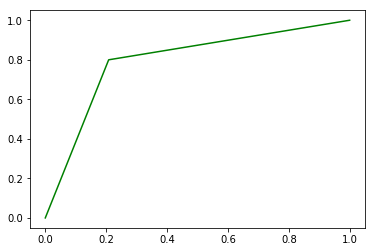

In [55]:
plt.plot(FPR,TPR,'g')

In [56]:
print(classification_report(y_test_smote,smote_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79     35980
           1       0.79      0.80      0.80     35980

    accuracy                           0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



we can see from roc_curve and f1-score that logistic regression is performing well on synthetic data 

##### Decision Tree

In [45]:
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
#predict new test cases
C50_Predictions = C50_model.predict(X_test)

In [46]:
CM_dec=pd.crosstab(y_test,C50_Predictions)

In [47]:
CM_dec

col_0,0,1
target,,
0,32670,3310
1,3234,786


In [48]:
TN = CM_dec.iloc[0,0]
FN = CM_dec.iloc[1,0]
TP = CM_dec.iloc[1,1]
FP = CM_dec.iloc[0,1]
Accuracy=((TN+TP)/(TN+FP+TP+FN))*100
print(Accuracy)

83.64


In [50]:
FPR,TPR,thresholds=roc_curve(y_test,C50_Predictions)

In [51]:
print(auc(FPR,TPR))

0.551763417487327


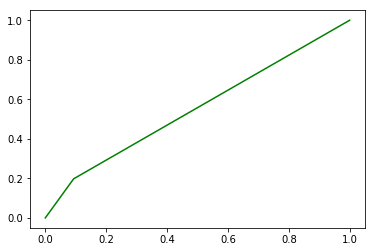

In [64]:
plt.plot(FPR,TPR,'g')

In [65]:
print(classification_report(y_test,C50_Predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     35980
           1       0.19      0.20      0.19      4020

    accuracy                           0.84     40000
   macro avg       0.55      0.55      0.55     40000
weighted avg       0.84      0.84      0.84     40000



So, by looking at the roc_curve and f1-score we can say that decision tree also not performing well on imbalanced target
class data

###### Let's apply decision tree on synthetic data

In [52]:
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train_smote, y_train_smote)
#predict new test cases
C50_Predictions = C50_model.predict(X_test_smote)

In [53]:
CM_dec=pd.crosstab(y_test_smote,C50_Predictions)

In [54]:
CM_dec

col_0,0,1
row_0,,
0,27044,8936
1,16550,19430


In [55]:
TN = CM_dec.iloc[0,0]
FN = CM_dec.iloc[1,0]
TP = CM_dec.iloc[1,1]
FP = CM_dec.iloc[0,1]
Accuracy=((TN+TP)/(TN+FP+TP+FN))*100
print(Accuracy)

64.58310172317955


In [57]:
FPR,TPR,thresholds=roc_curve(y_test_smote,C50_Predictions)

In [58]:
print(auc(FPR,TPR))

0.6458310172317954


In [71]:
print(classification_report(y_test_smote,C50_Predictions))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68     35980
           1       0.68      0.53      0.60     35980

    accuracy                           0.64     71960
   macro avg       0.65      0.64      0.64     71960
weighted avg       0.65      0.64      0.64     71960



as we can see accuracy is very low when we applied decision tree model on synthetic data that means decision tree is not performing good on synthetic data as well

In [59]:
#training data
lgb_train=lgb.Dataset(X_train_smote,label=y_train_smote)
#test data
lgb_test=lgb.Dataset(X_test_smote,label=y_test_smote)

In [60]:
param = {'objective' : "binary", 
               'boost':"gbdt",
               'metric':"auc",
               'boost_from_average':"false",
               'num_threads':8,
               'learning_rate' : 0.01,
               'num_leaves' : 13,
               'max_depth':-1,
               'tree_learner' : "serial",
               'feature_fraction' : 0.05,
               'bagging_freq' : 5,
               'bagging_fraction' : 0.4,
               'min_data_in_leaf' : 80,
               'min_sum_hessian_in_leaf' : 10.0,
               'verbosity' : 1}

In [61]:
num_rounds=20000
lgbm= lgb.train(param,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_test],verbose_eval=400,early_stopping_rounds = 3000)
lgbm

Training until validation scores don't improve for 3000 rounds.
[400]	training's auc: 0.926714	valid_1's auc: 0.918969
[800]	training's auc: 0.933359	valid_1's auc: 0.924399
[1200]	training's auc: 0.939022	valid_1's auc: 0.929566
[1600]	training's auc: 0.943914	valid_1's auc: 0.933757
[2000]	training's auc: 0.947985	valid_1's auc: 0.93728
[2400]	training's auc: 0.951378	valid_1's auc: 0.940214
[2800]	training's auc: 0.954247	valid_1's auc: 0.94256
[3200]	training's auc: 0.956631	valid_1's auc: 0.944562
[3600]	training's auc: 0.958704	valid_1's auc: 0.946219
[4000]	training's auc: 0.960378	valid_1's auc: 0.947565
[4400]	training's auc: 0.961928	valid_1's auc: 0.948653
[4800]	training's auc: 0.96327	valid_1's auc: 0.949609
[5200]	training's auc: 0.964451	valid_1's auc: 0.950364
[5600]	training's auc: 0.965524	valid_1's auc: 0.951033
[6000]	training's auc: 0.96653	valid_1's auc: 0.9516
[6400]	training's auc: 0.967439	valid_1's auc: 0.952087
[6800]	training's auc: 0.968306	valid_1's auc: 0

In [62]:
lgbm_predict_prob=lgbm.predict(X_test_smote,random_state=42,num_iteration=lgbm.best_iteration)
lgbm_predict=np.where(lgbm_predict_prob>=0.5,1,0)

In [63]:
CM_lgbm=pd.crosstab(y_test_smote,lgbm_predict)

In [64]:
CM_lgbm

col_0,0,1
row_0,,
0,33339,2641
1,5302,30678


In [65]:
TN = CM_lgbm.iloc[0,0]
FN = CM_lgbm.iloc[1,0]
TP = CM_lgbm.iloc[1,1]
FP = CM_lgbm.iloc[0,1]
Accuracy=((TN+TP)/(TN+FP+TP+FN))*100
print(Accuracy)

88.96192329071707


In [67]:
FPR,TPR,thresholds=roc_curve(y_test_smote,lgbm_predict)

In [68]:
print(auc(FPR,TPR))

0.8896192329071707


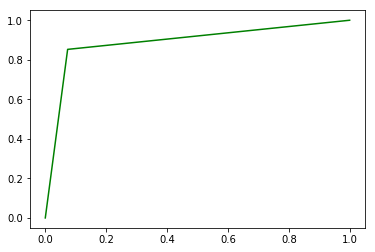

In [69]:
plt.plot(FPR,TPR,'g')

In [70]:
print(classification_report(y_test_smote,lgbm_predict))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     35980
           1       0.92      0.85      0.89     35980

    accuracy                           0.89     71960
   macro avg       0.89      0.89      0.89     71960
weighted avg       0.89      0.89      0.89     71960



from the roc_curve and f1-score we can conclude that Lightgbm model is performing well 

##### As we got best accuracy,precision,recall and f1-score from lightgbm model we used it predict the test data 

In [11]:
test=pd.read_csv("test.csv")

In [287]:
test.shape

(200000, 201)

In [288]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [12]:
test=test.drop("ID_code",axis=1)

In [13]:
test.shape

(200000, 200)

In [14]:
lgbm_predict_prob=lgbm.predict(test,random_state=42,num_iteration=lgbm.best_iteration)
lgbm_predict=np.where(lgbm_predict_prob>=0.5,1,0)

In [15]:
test['target']=lgbm_predict

In [16]:
test.shape

(200000, 201)

In [299]:
test.to_csv("predicted_test.csv",index=False)